### 載入套件

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf


In [2]:
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))


2.9.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### 準備資料

In [3]:
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### 建立模型

In [4]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

model = Sequential()

#Layer 1
#Conv Layer 1
model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (28,28,1)))
#Pooling layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))
#Layer 2
#Conv Layer 2
model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6)))
#Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))
#Flatten
model.add(Flatten())
#Layer 3
#Fully connected layer 1
model.add(Dense(units = 120, activation = 'relu'))
#Layer 4
#Fully connected layer 2
model.add(Dense(units = 84, activation = 'relu'))
#Layer 5
#Output Layer
model.add(Dense(units = 10, activation = 'softmax'))

### 訓練模型

In [5]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 3s 2ms/step - loss: 0.3306 - accuracy: 0.9042 - val_loss: 0.0869 - val_accuracy: 0.9777
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.9716 - val_loss: 0.0672 - val_accuracy: 0.9825
Epoch 3/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0649 - accuracy: 0.9795 - val_loss: 0.0660 - val_accuracy: 0.9803
Epoch 4/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0525 - accuracy: 0.9834 - val_loss: 0.0552 - val_accuracy: 0.9843
Epoch 5/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0432 - accuracy: 0.9864 - val_loss: 0.0529 - val_accuracy: 0.9873
Epoch 6/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0365 - accuracy: 0.9884 - val_loss: 0.0432 - val_accuracy: 0.9887
Epoch 7/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0333 - accuracy: 0.9896 - val_loss: 0.0396 - val_accuracy: 0.9898
Epoch 

### 評估模型

In [6]:
# score = model.evaluate(x_test, y_test, verbose=0)
loss, accuracy = model.evaluate(x_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.0428 - accuracy: 0.9877
Test loss: 0.04281735420227051
Test accuracy: 0.9876999855041504


### 繪製學習曲線

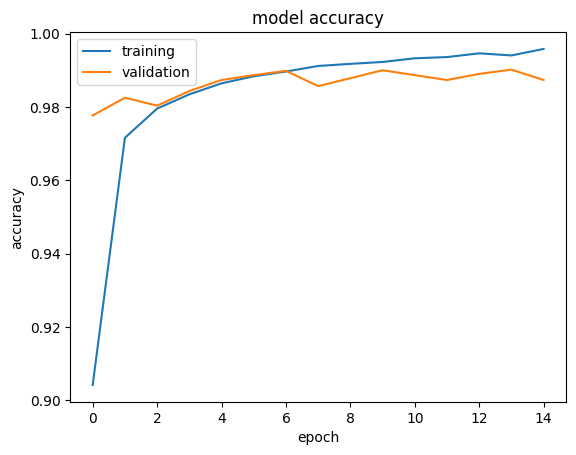

Test loss: 0.0428
Test accuracy: 0.988


In [7]:
from  matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')